# Credit Card Fraud Detection Project

**Name**: Thato Maelane    
**Email**: thato6216@gmail.com  
**LinkedIn**: [https://www.linkedin.com/in/thatomaelane](https://www.linkedin.com/in/thatomaelane)  
**GitHub**: [https://github.com/thatomaelane](https://github.com/thatomaelane)  
**Kaggle**: [https://www.kaggle.com/thatomaelane](https://www.kaggle.com/thatomaelane)  
**Date**: 09 June 2025

---

*This notebook presents a machine learning approach to detecting credit card fraud using logistic regression and random forest models.*


**Libraries**

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

**CreditCard_Dataset**

In [2]:
df = pd.read_csv("creditcard.csv")

**5_rows_of_data**

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Shape_of_the_dataset**

In [4]:
df.shape


(284807, 31)

**Column_Names**

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**Info_about_the_dataset**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Check_for_Missing_data**

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Number_of_Fraud_Cases**

In [8]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

**Class_Distribution_Plot**

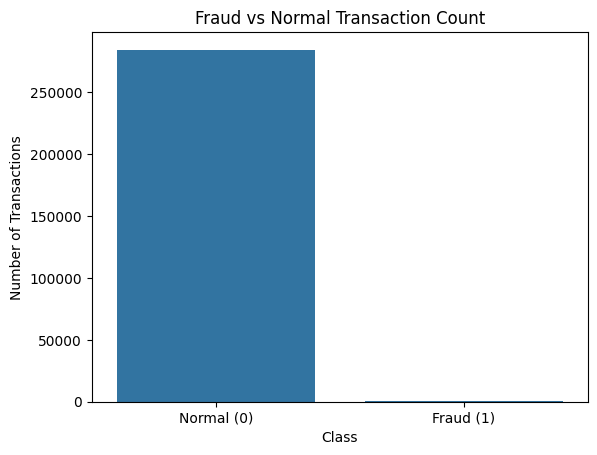

In [9]:
sns.countplot(data=df, x='Class')
plt.title("Fraud vs Normal Transaction Count")
plt.xticks([0, 1], ["Normal (0)", "Fraud (1)"])
plt.ylabel("Number of Transactions")
plt.show()

**Amount_of_Money_in_Fraud_VS_Normal_Plot**

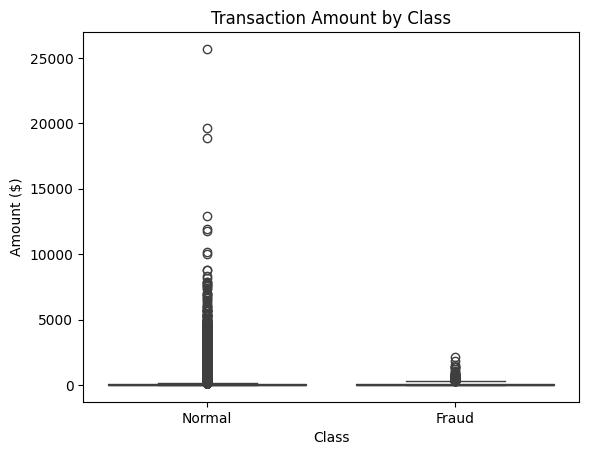

In [10]:
sns.boxplot(data=df, x='Class', y='Amount')
plt.title("Transaction Amount by Class")
plt.xticks([0, 1], ["Normal", "Fraud"])
plt.ylabel("Amount ($)")
plt.show()

**Separation_of_Features(X)_and_Target(y)**

In [11]:
X = df.drop('Class', axis=1)  # feature matrix
y = df['Class']               # Target vector

**Splitting_into_Train_and_Test_datasets**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,               # X = features, y = labels (Class: fraud or not)
    test_size=0.3,      # 30% of data for testing
    random_state=42,    # So results are always the same
    stratify=y          # Keeps the same fraud vs normal ratio in both sets
)

**Instantiate_LogisticRegression_model_named_model**

In [15]:
model = LogisticRegression(max_iter=1000)


**Train(Fit)_the_Model**

In [16]:
model.fit(X_train, y_train)


C:\Users\thato\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


**Predictions_on_the_test_set**

In [21]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(85443,))

**Evaluation_or_Perfomance_Matrix**

In [23]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[85278    17]
 [   50    98]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.66      0.75       148

    accuracy                           1.00     85443
   macro avg       0.93      0.83      0.87     85443
weighted avg       1.00      1.00      1.00     85443



**Generate_Confusion_Matrix**

In [24]:
cm = confusion_matrix(y_test, y_pred)

**Confusion_Matrix_Heatmap_Plot**

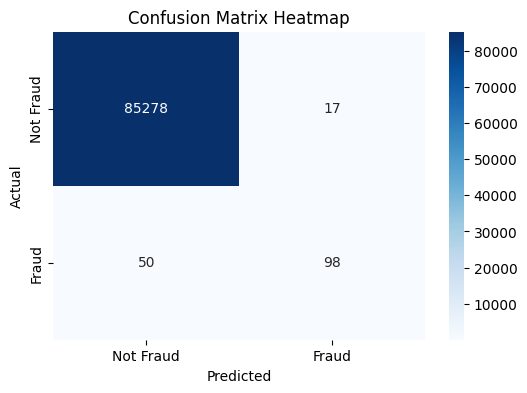

In [25]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

**Instantiate_RandomForestClassifier**

In [27]:
rf_model = RandomForestClassifier(random_state=42)

**Train(Fit)_the_Model**

In [28]:
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


**Predictions_on_the_dataset**

In [29]:
rf_predictions = rf_model.predict(X_test)
rf_predictions

array([0, 0, 0, ..., 0, 0, 0], shape=(85443,))

**Evaluation_or_Perfomance_Matrix**

In [30]:
# Confusion matrix
rf_cm = confusion_matrix(y_test, rf_predictions)
print("Random Forest Confusion Matrix:")
print(rf_cm)

# Classification report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Confusion Matrix:
[[85290     5]
 [   36   112]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



**Confusion_Matrix_Heatmap_Plot**

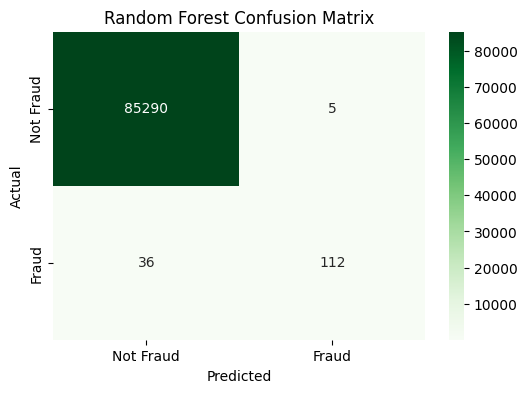

In [31]:
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Greens", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()